# Smartphone Price Prediction


### Importing Necessaary Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [82]:
data=pd.read_csv("../data/Mobile phone price.csv")

In [83]:
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 25.6+ KB


In [85]:
data=data.rename(columns={'Storage ':'Storage',"Camera (MP)":"Camera","Battery Capacity (mAh)":"Battery","Price ($)":"Price","Screen Size (inches)":"ScreenSize","RAM ":"RAM"})

In [86]:
data.shape

(407, 8)

### Description on Dataset
This is an Minimilistic Dataset with less number of features but significant features which highly influences the price of mobile.
The dataset is obtained from a publicly available source on kaggle.<br>
It contains 8 Columns and 407 rows. 



- Brand: the manufacturer of the phone

- Model: the name of the phone model

- Storage (GB): the amount of storage space (in gigabytes) available on the phone

- RAM (GB): the amount of RAM (in gigabytes) available on the phone

- Screen Size (inches): the size of the phone's display screen in inches

- Camera (MP): the megapixel count of the phone's rear camera(s)

- Battery Capacity (mAh): the capacity of the phone's battery in milliampere hours

- Price ($): the retail price of the phone in US dollars

###### Reason for choosing the dataset 
The chosen dataset may be small but it is a good dataset for beginners to analyze and apply core concepts machine learning lifecycle such as feature selection, feature engineering etc, rather than getting lost in data with huge feature set.

The columns values are recognised as objects, therefore we wouldnt be able to use it as such directly. We need to convert them to relevant datatype

### Data Cleaning

The following has to be done in the data cleaning process.


- Convert Storage to integer
- Convert RAM to integer
- Convert ScreenSize to float
- Convert camera into relevant datatype( We'll see this in feature engineering)

In [87]:
data['Storage']=data['Storage'].str.extract(r'(\d+\d+)').astype('int')             #exctracting digits of Storage and converting into numbers
data['RAM']=data['RAM'].str.extract(r'(\d+)').astype('int')                        #extracting digit of RAM and converting into integer
data['ScreenSize'] = data['ScreenSize'].str.extract(r'(\d+.\d+)').astype('float') #extracting the float value from the column


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       407 non-null    object 
 1   Model       407 non-null    object 
 2   Storage     407 non-null    int32  
 3   RAM         407 non-null    int32  
 4   ScreenSize  403 non-null    float64
 5   Camera      407 non-null    object 
 6   Battery     407 non-null    int64  
 7   Price       407 non-null    int64  
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 22.4+ KB


In [89]:
data

,Brand,Model,Storage,RAM,ScreenSize,Camera,Battery,Price
0,Apple,iPhone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429


### Feature Engineering

- As we all know, this step is one of the most crucial in a machine learning lifecycle which influences the performance any model directly. As mentioned, we need to convert the Camera column into useful data type which can be used in training the model. <br>
- We are going to convert the camera column and insert an camera Count column which would contain the number of the camera present in the mobile.<br>
- Since now we have the Count of the camera we could add another feature called CameraAvg depicting the average value of camera in a mobile.

In [90]:
data['Camera1']=(data['Camera'].str.replace("MP",""))           # removing extra character and getting it as an expression
data['Camera1']=(data['Camera1'].str.replace("3D",''))
data['Camera1']=(data['Camera1'].str.replace("ToF",""))
data['Camera1']=(data['Camera1'].str.strip())
data['Camera1']=(data['Camera1'].str.replace(" ",""))
data['Camera1']=(data['Camera1'].str.rstrip("+"))
data['CameraCount']=(data['Camera'].str.split("+"))  # splitting the value and mapping its length to get the column value to get CameraCount
data['CameraCount']=data['CameraCount'].map(len)

In [91]:
def Average(lst):
    lst=[float(x) for x in lst]
    return sum(lst) / len(lst)

In [92]:
data['CameraAvg']=data['Camera1'].str.split("+").apply(lambda x : Average(x))

In [93]:
data_v1=data.drop(['Camera'],axis=1)

- Also now starting to think we can use the individual camera resolutions as features too!!!
- So Let's Create 4 new columns indicating the the individual resolutions of the cameras.

In [94]:
cam1=[]
cam2=[]
cam3=[]
cam4=[]

for x in data['Camera1']:
    cameras=x.split('+')
    cameras_len = len(cameras)
    
    if cameras_len == 1:
        cam1.append(cameras[0])
        cam2.append('0')
        cam3.append('0')
        cam4.append('0')
    
    if cameras_len == 2:
        cam1.append(cameras[0])
        cam2.append(cameras[1])
        cam3.append('0')
        cam4.append('0')
    
    if cameras_len == 3:
        cam1.append(cameras[0])
        cam2.append(cameras[1])
        cam3.append(cameras[2])
        cam4.append('0')
    
    if cameras_len == 4:
        cam1.append(cameras[0])
        cam2.append(cameras[1])
        cam3.append(cameras[2])
        cam4.append(cameras[3])

data['cam1']=cam1
data['cam2']=cam2
data['cam3']=cam3
data['cam4']=cam4
    

In [95]:
data

,Brand,Model,Storage,RAM,ScreenSize,Camera,Battery,Price,Camera1,CameraCount,CameraAvg,cam1,cam2,cam3,cam4
0,Apple,iPhone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999,12+12+12,3,12.000000,12,12,12,0
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199,108+10+10+12,4,35.000000,108,10,10,12
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899,48+50+8+2,4,27.000000,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279,64+8+5+2,4,19.750000,64,8,5,2
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799,50+12.2,2,31.100000,50,12.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049,12+64+12,3,29.333333,12,64,12,0
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,48+8+2+2,4,15.000000,48,8,2,2
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099,12+12+12,3,12.000000,12,12,12,0
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429,48+13+8+2,4,17.750000,48,13,8,2


- Let's drop any duplicate information in the dataset...<br>
- Let's also drop Camera1 and Camera as it is redundant and irrelevant since we have CameraCount, CameraAvg, and individual camera, resolution

In [96]:
data.duplicated().sum()

28

In [97]:
data.drop_duplicates(inplace=True)

In [98]:
data.columns

Index(['Brand', 'Model', 'Storage', 'RAM', 'ScreenSize', 'Camera', 'Battery',
       'Price', 'Camera1', 'CameraCount', 'CameraAvg', 'cam1', 'cam2', 'cam3',
       'cam4'],
      dtype='object')

In [99]:
data.isnull().sum()

Brand          0
Model          0
Storage        0
RAM            0
ScreenSize     2
Camera         0
Battery        0
Price          0
Camera1        0
CameraCount    0
CameraAvg      0
cam1           0
cam2           0
cam3           0
cam4           0
dtype: int64

In [100]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 405
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        377 non-null    object 
 1   Model        377 non-null    object 
 2   Storage      377 non-null    int32  
 3   RAM          377 non-null    int32  
 4   ScreenSize   377 non-null    float64
 5   Camera       377 non-null    object 
 6   Battery      377 non-null    int64  
 7   Price        377 non-null    int64  
 8   Camera1      377 non-null    object 
 9   CameraCount  377 non-null    int64  
 10  CameraAvg    377 non-null    float64
 11  cam1         377 non-null    object 
 12  cam2         377 non-null    object 
 13  cam3         377 non-null    object 
 14  cam4         377 non-null    object 
dtypes: float64(2), int32(2), int64(3), object(8)
memory usage: 44.2+ KB


In [101]:
data['cam1']=data['cam1'].str.extract(r'(\d+)').astype('int') 
data['cam2']=data['cam2'].str.extract(r'(\d+)').astype('int')
data['cam3']=data['cam3'].str.extract(r'(\d+)').astype('int') 
data['cam4']=data['cam4'].str.extract(r'(\d+)').astype('int') 
data=data.drop(['Camera1','Camera','Model'],axis=1)             #we will be dropping the feature "Model" as it isn't relevant
data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 405
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        377 non-null    object 
 1   Storage      377 non-null    int32  
 2   RAM          377 non-null    int32  
 3   ScreenSize   377 non-null    float64
 4   Battery      377 non-null    int64  
 5   Price        377 non-null    int64  
 6   CameraCount  377 non-null    int64  
 7   CameraAvg    377 non-null    float64
 8   cam1         377 non-null    int32  
 9   cam2         377 non-null    int32  
 10  cam3         377 non-null    int32  
 11  cam4         377 non-null    int32  
dtypes: float64(2), int32(6), int64(3), object(1)
memory usage: 29.5+ KB


C:\Users\SIVA SUBRAMANIAM J\AppData\Local\Temp\ipykernel_17188\1664408643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cam1']=data['cam1'].str.extract(r'(\d+)').astype('int')
C:\Users\SIVA SUBRAMANIAM J\AppData\Local\Temp\ipykernel_17188\1664408643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cam2']=data['cam2'].str.extract(r'(\d+)').astype('int')
C:\Users\SIVA SUBRAMANIAM J\AppData\Local\Temp\ipykernel_17188\1664408643.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

### Data Visulization

Lets start Visualize the data and draw some inference like how is the data distributed, any outliers etc.

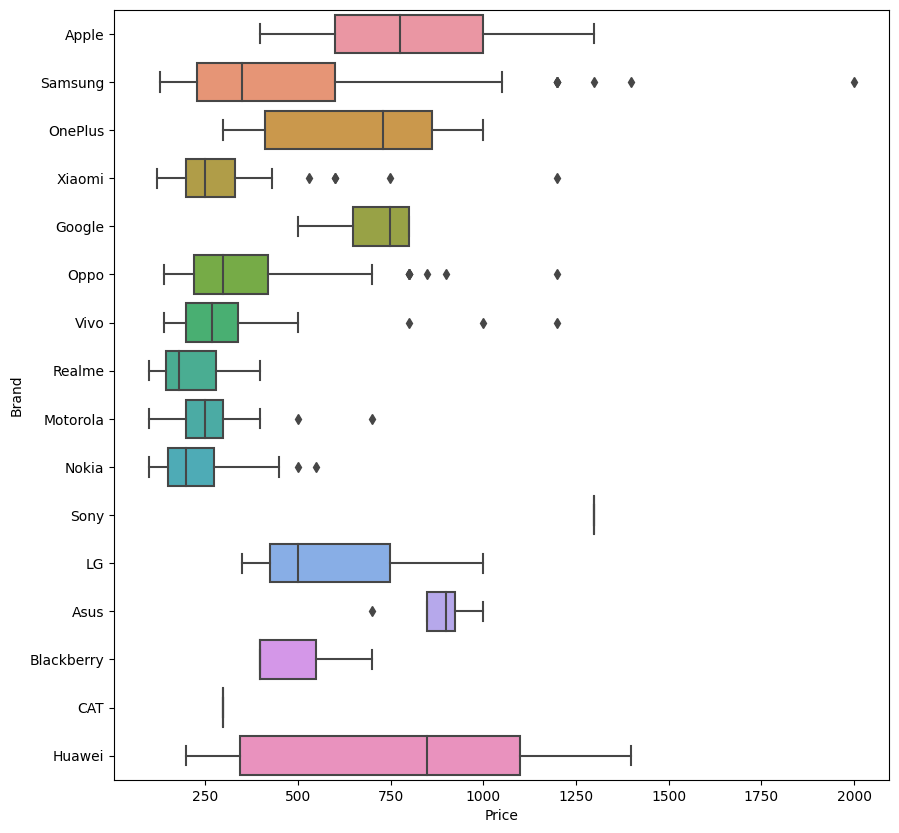

In [108]:
plt.figure(figsize=(10,10))
fig=sns.boxplot(data=data, x="Price",y="Brand")
fig.figure.savefig("../graphs/boxplot.png")

We can see that we have quiet a number of outliers, We have two options:-<br>

- To remove the Outlier completely to use classical regression models
- To use Huber Loss or Huber Regression for the model

We shall create the **one** dataset excluding the outliers and **another** with the outliers and we may analyze the results.


In [75]:
data.describe()

,Brand,Storage,RAM,ScreenSize,Battery,Price,CameraCount,CameraAvg,cam1,cam2,cam3,cam4
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,10.225464,125.114058,5.896552,6.484164,4700.915119,411.469496,3.164456,18.245469,43.899204,9.275862,3.779841,0.989390
std,4.114012,66.153836,2.464085,0.295115,774.962688,306.089969,0.757592,9.048022,24.651193,10.466678,5.035176,1.753384
min,0.000000,32.000000,2.000000,4.500000,1821.000000,99.000000,1.000000,5.000000,8.000000,0.000000,0.000000,0.000000
25%,8.000000,64.000000,4.000000,6.440000,4300.000000,199.000000,3.000000,12.000000,13.000000,2.000000,2.000000,0.000000
50%,11.000000,128.000000,6.000000,6.500000,5000.000000,299.000000,3.000000,18.000000,48.000000,8.000000,2.000000,0.000000
75%,14.000000,128.000000,8.000000,6.600000,5000.000000,499.000000,4.000000,24.666667,64.000000,12.000000,5.000000,2.000000
max,15.000000,512.000000,16.000000,7.600000,7000.000000,1999.000000,4.000000,56.000000,108.000000,64.000000,48.000000,12.000000


In [76]:
datacopy=data.copy(deep=True)   #the dataset without Outliers

In [77]:
Brand_names=datacopy["Brand"].unique()

##### Let's Write a function to remove outliers from each brand

- We find the IQR (Inter-Quartile Range)
- We find the upperbound and lowerbound for the each brand of mobile <br>

One might ask if we do brand wise elimination of outliers it may lead to overfitting but we shall consider this for now and analyze results

In [27]:
def remove_outliers(data,brand):
    brand_data=data[(data["Brand"]==brand)]                     #taking brand_dataframe
    iqr=brand_data["Price"].quantile([0.25,0.75])               #calulating IQR
    IQR=iqr[0.75]-iqr[0.25]
    upperbound=iqr[0.75]+(1.5*IQR)                             #calculating upperbound
    lowerbound=iqr[0.25]-(1.5*IQR)                             #calculating lowerbound
    data_removed=brand_data[(brand_data['Price'] <= lowerbound) | (brand_data['Price'] >= upperbound)]      #data to be removed from the dataset
    data=data.drop(data_removed.index)                        # remove using the index value in the variable "data_removed"
    return (data)
    

In [28]:
datacopy

,Brand,Storage,RAM,ScreenSize,Battery,Price,CameraCount,CameraAvg,cam1,cam2,cam3,cam4
0,Apple,128,6,6.10,3095,999,3,12.000000,12,12,12,0
1,Samsung,256,12,6.80,5000,1199,4,35.000000,108,10,10,12
2,OnePlus,128,8,6.70,4500,899,4,27.000000,48,50,8,2
3,Xiaomi,128,6,6.67,5020,279,4,19.750000,64,8,5,2
4,Google,128,8,6.40,4614,799,2,31.100000,50,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
401,Huawei,128,4,6.15,3340,329,3,19.333333,48,8,2,0
402,Samsung,128,8,6.70,4300,1049,3,29.333333,12,64,12,0
403,Xiaomi,128,6,6.57,4160,349,4,15.000000,48,8,2,2
404,Apple,128,6,6.70,3687,1099,3,12.000000,12,12,12,0


In [29]:
for i in Brand_names:
    datacopy=remove_outliers(datacopy,i)

In [30]:
datacopy

,Brand,Storage,RAM,ScreenSize,Battery,Price,CameraCount,CameraAvg,cam1,cam2,cam3,cam4
0,Apple,128,6,6.10,3095,999,3,12.000000,12,12,12,0
2,OnePlus,128,8,6.70,4500,899,4,27.000000,48,50,8,2
3,Xiaomi,128,6,6.67,5020,279,4,19.750000,64,8,5,2
4,Google,128,8,6.40,4614,799,2,31.100000,50,12,0,0
5,Apple,128,4,6.10,2815,799,2,12.000000,12,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
401,Huawei,128,4,6.15,3340,329,3,19.333333,48,8,2,0
402,Samsung,128,8,6.70,4300,1049,3,29.333333,12,64,12,0
403,Xiaomi,128,6,6.57,4160,349,4,15.000000,48,8,2,2
404,Apple,128,6,6.70,3687,1099,3,12.000000,12,12,12,0


##### Heat Map

Let's analyze the heat map for correlation between features which would be helpful in training the model

In [31]:
datacopy_num=datacopy.drop(['Brand'],axis=1)

In [32]:
datacopy_cat=datacopy.select_dtypes(object)

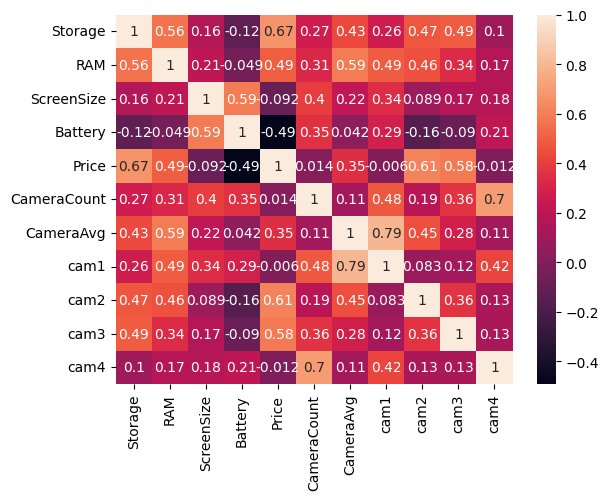

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 405
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        377 non-null    object 
 1   Storage      377 non-null    int32  
 2   RAM          377 non-null    int32  
 3   ScreenSize   377 non-null    float64
 4   Battery      377 non-null    int64  
 5   Price        377 non-null    int64  
 6   CameraCount  377 non-null    int64  
 7   CameraAvg    377 non-null    float64
 8   cam1         377 non-null    int32  
 9   cam2         377 non-null    int32  
 10  cam3         377 non-null    int32  
 11  cam4         377 non-null    int32  
dtypes: float64(2), int32(6), int64(3), object(1)
memory usage: 29.5+ KB


In [109]:
sns.heatmap(datacopy_num.corr(),annot=True).figure.savefig("../graphs/heatmap.png")
plt.show()
data.info()

- We can see that storage has highest correlation(0.67) with price among other features
- Battery has a negative correlation (-0.49) with the Price. This is interesting because  high end mobiles comes with a less battery pack with is evident from the negative correlation
- Also features among themselves aren't correlated that much i think we are good to go for model training

### Data Encoding

- The Brand Value may also help in predicting the price, so we shall encode it into numbers which could be used to train the model.
- We shall be using LabelEncoder to encode the feature "Brand"



In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder=LabelEncoder()

In [36]:
datacopy['Brand']=label_encoder.fit_transform(datacopy['Brand'])
data['Brand']=label_encoder.fit_transform(data['Brand'])

- Lets Separate Features and Target(Label) for model training

In [37]:
y_wo_outlier=datacopy['Price']   # splitting the dataset without outliers

In [38]:
X_wo_outlier=datacopy.drop(['Price'],axis=1)

In [39]:
y=data['Price']                  #splitting the original dataset with outliers
X=data.drop(['Price'],axis=1)

### Metric Selection

We are going to use the 3 classical metrics used for regression problemms

- MSE- Mean Sqaured Error
- MAE- Mean Absolute Error
- RMSE-Root Mean Squared Error

One upperhand in using MAE and RMSE is that the units of the error score match the units of the target value that is being predicted.

-**Brief about the Metrics**

- MSE is an important loss function for algorithms fit or optimized using the least squares framing of a regression problem. Here “least squares” refers to minimizing the mean squared error between predictions and expected values.


- RMSE, is an extension of the mean squared error.Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted

- MAE, is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted.
Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

### Data Split

- We shall split the data into train and test datset using the train_test_split function in sklearn
  

In [40]:
from sklearn.model_selection import train_test_split
Xtrain_wo,Xtest_wo,ytrain_wo,ytest_wo=train_test_split(X_wo_outlier,y_wo_outlier,test_size=0.3,random_state=1) #split for the dataset without outlier


Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1) #split for original dataset with outlier

### Model Selection
#### Linear Regression
- Lets Start with the Classical Linear Regression model and analyze the results between the data with and with outliers
- The linear regression model provides a sloped straight line representing the relationship between the features. This Straight line is used as reference to predict the value of the target, in our case it is the price of the mobile
- We shall use machine learning pipeline to make our life bit easier

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline


model_objects=[]


##### Custom Object for Evalution of any model

The below class implements a Object every model containing its pipline, metric which can be used to analyze 

In [42]:
class model_evaluate:
    def __init__(self,model,xtrain,ytrain,xtest,ytest,featurescaling=StandardScaler()):
        self.model_pipeline=Pipeline([("feature_scaling",featurescaling),(type(model).__name__,model)]) #Creating Model Pipeline with feature scaling and model
        self.model_pipeline.fit(xtrain,ytrain)                                                          #Fit the model with the given data
        self.r2_score=self.model_pipeline.score(xtest,ytest)                                            #Getting r2 score from pipeline
        self.ypred=self.model_pipeline.predict(xtest)                                                   #Making prediction with the model
        self.MAE=mean_absolute_error(ytest,self.ypred)                                                  #Calculating mean absolute error
        self.MSE=mean_squared_error(ytest,self.ypred)                                                   #Calculating mean squared error
        self.com_pd=pd.DataFrame({'Price':ytest,'Predicted_Price':self.ypred},columns=['Price','Predicted_Price']) # DataFrame to compare between predicted and actual value
        self.RMSE=self.MSE**0.5
    def __str__(self):            # Overriding the print statement to print the metric of the model
        return("R2_score is :{} \nMAE      is :{}\nMSE      is :{}\nRMSE     is :{}".format(self.r2_score,self.MAE,self.MSE,self.RMSE))

##### Linear Regression Model without Outliers

In [43]:
Lin_reg_wo_outlier=model_evaluate(LinearRegression(),Xtrain_wo,ytrain_wo,Xtest_wo,ytest_wo)
model_objects.append(Lin_reg_wo_outlier)
print(Lin_reg_wo_outlier)

R2_score is :0.7943246715176291 
MAE      is :74.97102444927953
MSE      is :10460.77592858767
RMSE     is :102.27793471021826


In [44]:
Lin_reg_wo_outlier.com_pd.head()

,Price,Predicted_Price
96,279,370.287714
212,179,122.422039
122,179,113.104623
120,199,266.226229
139,109,215.492602


##### Linear Regression Model with Outliers

In [45]:
lin_reg=model_evaluate(LinearRegression(),Xtrain,ytrain,Xtest,ytest)

##### Linear Regression Model with Outliers

In [46]:
print(lin_reg)

R2_score is :0.7184723338370405 
MAE      is :114.45593457405009
MSE      is :35797.09842689034
RMSE     is :189.20121148367508


##### Inference on Linear Regression
- We can see that the Linear Regression performs better in the dataset which has no Outliers.
- Therefor we can verify that Linear Regression is **Sensitive** to outlier effects
- Also the metric results are not satisfactory

#### SGDRegression

- SGD Regressor is a machine learning algorithm that uses stochastic gradient descent to make predictions.
- SGD Regressor works by taking a dataset as input and then using its gradient descent algorithm to find the best fit line through the data.
  ###### Advantages

  - First, it is much| faster than other algorithms, making it ideal for large datasets.
  - It also works well with sparse datasets since it can ignore irrelevant features.
 
Lets implement it and check out the results


##### SGDRegression Model without Outliers

In [47]:
SGD_wo_outlier=model_evaluate(SGDRegressor(),Xtrain_wo,ytrain_wo,Xtest_wo,ytest_wo)
model_objects.append(SGD_wo_outlier)

In [48]:
print(SGD_wo_outlier)

R2_score is :0.7940370859147675 
MAE      is :74.81644630880744
MSE      is :10475.402712334759
RMSE     is :102.34941481188233


In [49]:
SGD=model_evaluate(SGDRegressor(),Xtrain,ytrain,Xtest,ytest)

In [50]:
print(SGD)
SGD.com_pd.head()

R2_score is :0.7199045796521495 
MAE      is :115.06950421073036
MSE      is :35614.98401833598
RMSE     is :188.7193260329635


,Price,Predicted_Price
141,149,85.381048
219,279,233.932957
92,319,270.933462
164,229,218.751835
104,1199,1646.872313


##### Inferences

* We can again see that presence of outliers affect the performances of the model
* We had expected SGD to perform better but its performances its similar to linear regression.
     - This could be due to the small dataset with about 300 data points to train on.
     - This score could be increased by using cross validation and used best parameters using gridsearch or randomsearch cross validation

            

#### RandomForestRegressor
- Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset
- It based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
    ###### Advantages


    - It takes less training time as compared to other algorithms
    - It predicts output with high accuracy

    
Lets implement it and check out the results
  

##### RandomForestRegressor Model without Outliers

In [51]:
RFR_wo_outlier=model_evaluate(RandomForestRegressor(),Xtrain_wo,ytrain_wo,Xtest_wo,ytest_wo)
model_objects.append(RFR_wo_outlier)
print(RFR_wo_outlier)

R2_score is :0.9151874518497609 
MAE      is :40.82214598364598
MSE      is :4313.619278883267
RMSE     is :65.67814917370363


##### RandomForestRegressor Model with Outliers

In [52]:
RFR=model_evaluate(RandomForestRegressor(),Xtrain,ytrain,Xtest,ytest)
print(RFR)

R2_score is :0.8035806518124323 
MAE      is :85.44665032336086
MSE      is :24975.317118375286
RMSE     is :158.03580960774454


##### Inferences

* We can again see a drastic difference between the dataset with outlier and without outlier, The dataset without outlier has about half of the  mean absolute error of the original dataset with outliers produce
* RandomForest as mentioned gives about 90% R2 score and only about 40 Mean Absolute Error
* Also to keep in mind that that the random forest do not overfit to the dataset.
    ##### Drawbacks
  - RandomForest algorithmn is not meant for regression as the range of predictions a RandomForest can make is bound by the highest and lowest labels in the training data.This behaviour becomes problematic in situations wehre the training and prediction inputs differ in their range and distribution
  - Chance of getting overfit to the dataset

#### Note 
- For the following model, we shall be only working with the dataset without outliers, as it is evident from the above models that the data without performs better than the dataset with outliers


#### CatBoostRegressor

- CatBoost is a gradient-boosting ML system that sets itself apart from other GBDTs by offering unique solutions for interpreting data sources that are highly categorical or contain missing data points.
- CatBoost achieves this by using the split-by-popularity method to create symmetrical decision trees.
- By grouping features into a single split with only a left and right child, the necessary processing power and time are greatly reduced when compared to trees with children for each individual feature in a set. These features could be categorical or numerical.

Lets implement and analyze the model

In [53]:
from catboost import CatBoostRegressor
catboost=model_evaluate(CatBoostRegressor(),Xtrain_wo,ytrain_wo,Xtest_wo,ytest_wo)
model_objects.append(catboost)

Learning rate set to 0.032742
0:	learn: 266.2752312	total: 148ms	remaining: 2m 28s
1:	learn: 261.4234199	total: 149ms	remaining: 1m 14s
2:	learn: 256.1478768	total: 149ms	remaining: 49.6s
3:	learn: 250.9177699	total: 150ms	remaining: 37.3s
4:	learn: 245.7607298	total: 150ms	remaining: 29.9s
5:	learn: 240.8920402	total: 151ms	remaining: 24.9s
6:	learn: 236.2906527	total: 151ms	remaining: 21.4s
7:	learn: 231.2803145	total: 152ms	remaining: 18.8s
8:	learn: 226.9299804	total: 152ms	remaining: 16.7s
9:	learn: 222.6150345	total: 152ms	remaining: 15.1s
10:	learn: 218.5198119	total: 153ms	remaining: 13.7s
11:	learn: 214.5247076	total: 153ms	remaining: 12.6s
12:	learn: 210.5720753	total: 154ms	remaining: 11.7s
13:	learn: 207.1769175	total: 154ms	remaining: 10.8s
14:	learn: 203.5052510	total: 154ms	remaining: 10.1s
15:	learn: 199.8449277	total: 155ms	remaining: 9.53s
16:	learn: 196.1856378	total: 155ms	remaining: 8.98s
17:	learn: 192.4233004	total: 156ms	remaining: 8.5s
18:	learn: 188.8584914	to

In [54]:
print(catboost)

R2_score is :0.9157788626899286 
MAE      is :39.11132557687232
MSE      is :4283.539753417663
RMSE     is :65.44875669879194


##### Inferences
* CatBoost also produces similar results to the Randomforest model
* One advantage of using CatBoost is that no need to encode categorical variable as it takes care of it
    ##### Disadvantages

  - It may perform very bad if the variables are not properly tuned

#### LGBMRegressor

- LightGBM is a gradient boosting ensemble method that is used by the Train Using AutoML tool and is based on decision trees. 
- As with other decision tree-based methods, LightGBM can be used for both classification and regression.
- LightGBM is optimized for high performance with distributed systems.

In [55]:
from lightgbm import LGBMRegressor
lgbm=model_evaluate(LGBMRegressor(),Xtrain_wo,ytrain_wo,Xtest_wo,ytest_wo)
model_objects.append(lgbm)

print(lgbm)

R2_score is :0.8995773502789502 
MAE      is :46.54820967097329
MSE      is :5107.558814362076
RMSE     is :71.46718697669635


##### Inferences
* We can see that there is dip in R2_score and the MAE, RMSE have increased as compared to RandomForest and CatBoostRegressor
     - This maybe due to the fact that there is only Limited Feature Selection for a given dataset. It will select only the features with highest correlation to the target variable
##### Drawbacks
- LightBGM has many Hyperparameters which can be difficult to optimize. Finding the best combination of hyperparameters to maximizing accuracy can be challenging and ccan be time-consuming

#### XGBRegressor

-  XgBoost (Extreme Gradient Boosting) library of Python was introduced at the University of Washington by scholars.
-  XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems.
-  The two main reasons to use XGBoost are execution speed and model performance
- The difference between XGBRegressor and LGBMRegressor is that
    * XGBRegressor uses level-wise(horizontal) growth
    * LGBMRegressor uses leaf-wise(vertical) growth
  
              

In [56]:
from xgboost import XGBRegressor
XGBR=model_evaluate(XGBRegressor(),Xtrain_wo,ytrain_wo,Xtest_wo,ytest_wo)
model_objects.append(XGBR)
print(XGBR)

R2_score is :0.9025859452430992 
MAE      is :41.54388711111886
MSE      is :4954.5397915552785
RMSE     is :70.3884918971509


##### Inferences
* The metrics of XGBRegressor are similar to the LGBMRegressor but are better than same.
* This is due to the better optimization of the XGBRegressor and it works well with sparse input dadta for tree and linear booster 
##### Drawbacks
- LightBGM has many Hyperparameters which can be difficult to optimize. Finding the best combination of hyperparameters to maximizing accuracy can be challenging and ccan be time-consuming

#### HuberRegressor
The Huber Regressor optimizes the squared loss for the samples where |(y - Xw - c) / sigma| < epsilon and the absolute loss for the samples where |(y - Xw - c) / sigma| > epsilon, where the model coefficients w, the intercept c and the scale sigma are parameters to be optimized. The parameter sigma makes sure that if y is scaled up or down by a certain factor, one does not need to rescale epsilon to achieve the same robustness. Note that this does not take into account the fact that the different features of X may be of different scales.

  

In [57]:
huber_wo=model_evaluate(HuberRegressor(),Xtrain_wo,ytrain_wo,Xtest_wo,ytest_wo)  #HuberRegression for the dataset without Outlier 
print(huber_wo)
model_objects.append(huber_wo)

R2_score is :0.8051360786444376 
MAE      is :67.61827133095615
MSE      is :9910.900995795362
RMSE     is :99.55350820435893


In [58]:
huber=model_evaluate(HuberRegressor(),Xtrain,ytrain,Xtest,ytest)    #HuberRegression for the dataset with Outlier

In [59]:
print(huber)

R2_score is :0.6625565194846426 
MAE      is :120.50050734107542
MSE      is :42906.96417214145
RMSE     is :207.13996275982444


##### Inferences
- HuberRegression also underperforms in the dataset with outliers,(what may be the reason?)
- Therefore in any dataset before training the model it is highly recommended to remove the outliers

#### Additional Ideas for future work
- Increasing the model performance by using CrossValition
- By using any of the methods such as GridSearchCV or RandomSearchCV we could estimate best hyperparameters for the model which could imporve the performaces of the model

### Conclusions
Let's Draw Some conclusions by ploting the metrics of all the models implemented.
We are considering only the models which were trained without the outliers as the performance is at its best


In [60]:
MAElist=[x.MAE for x in model_objects]        # getting MAE of all the model in the model_object into list to combine later into pandas Dataframe
MSElist=[x.MSE for x in model_objects]        # getting MSE of all the model in the model_object into list to combine later into pandas Dataframe
RMSElist=[x.RMSE for x in model_objects]      # getting RMSElist of all the model sin the model_objects into list to combine later into pandas Dataframe
r2_scorelist=[x.r2_score for x in model_objects] 
models=[x.model_pipeline.steps[-1][1].__class__.__name__ for x in model_objects]

In [61]:
pltdf=pd.concat([pd.DataFrame(models),pd.DataFrame(MSElist),pd.DataFrame(MAElist),pd.DataFrame(RMSElist),pd.DataFrame(r2_scorelist)], axis = 1) # combining to dataframe

In [62]:
pltdf.columns=["Model","MSE","MAE","RMSE","r2_score"]  # Naming the columns

In [63]:
pltdf

,Model,MSE,MAE,RMSE,r2_score
0,LinearRegression,10460.775929,74.971024,102.277935,0.794325
1,SGDRegressor,10475.402712,74.816446,102.349415,0.794037
2,RandomForestRegressor,4313.619279,40.822146,65.678149,0.915187
3,CatBoostRegressor,4283.539753,39.111326,65.448757,0.915779
4,LGBMRegressor,5107.558814,46.548210,71.467187,0.899577
5,XGBRegressor,4954.539792,41.543887,70.388492,0.902586
6,HuberRegressor,9910.900996,67.618271,99.553508,0.805136


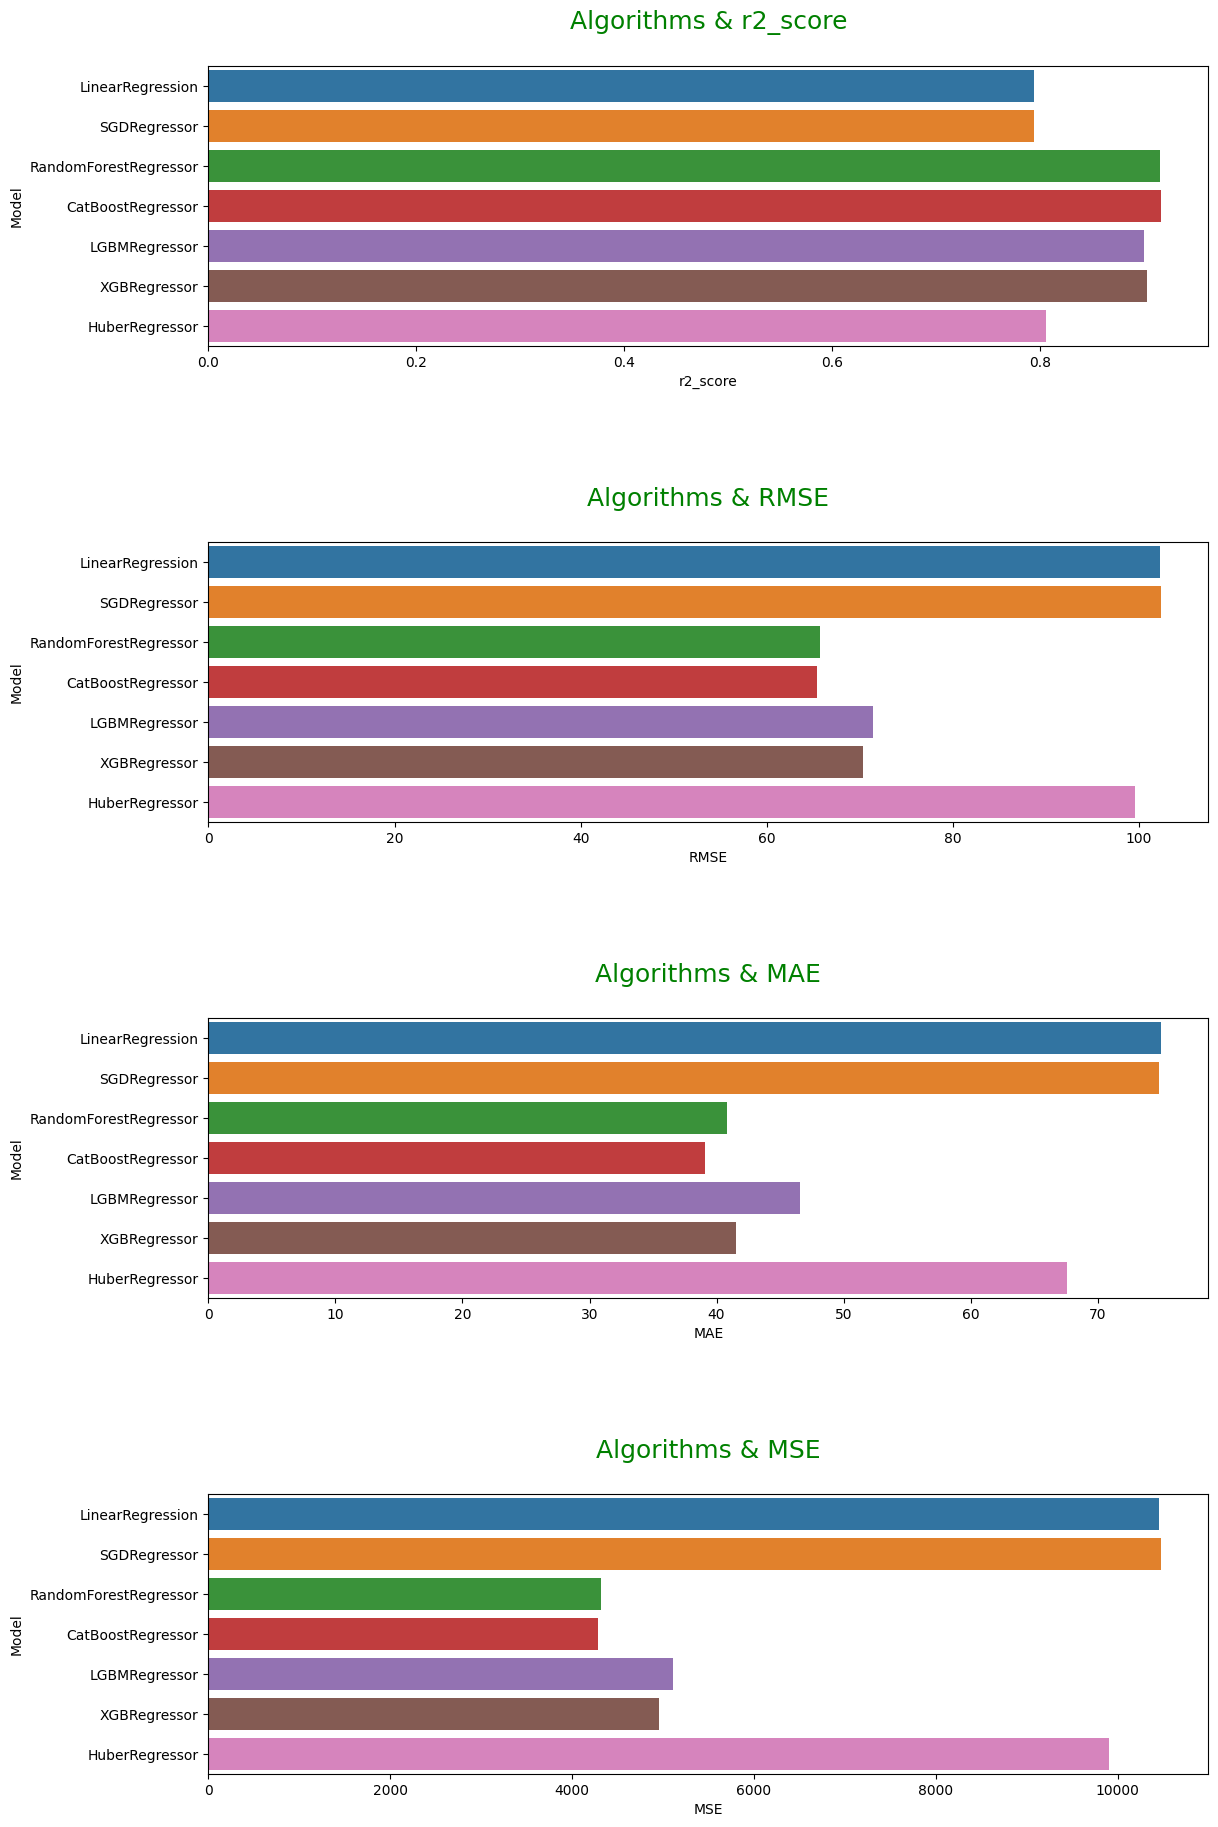

In [123]:
def savefigure(obj):
    fig_save=obj.get_figure()
    fig_save.savefig('hello.png')

k = 1                                     #using seabarn to plot the metrics values of the models implemented
canvas = plt.figure(figsize = (10,2.8))
for i in pltdf.columns[1:]:
    g1 = canvas.add_axes([1, k, 1, 1])
    g1 = sns.barplot(x = "{}".format(i), y = pltdf["Model"], data = pltdf.iloc[:,1:])
    g1.set_title("Algorithms & {}\n".format(i), fontdict={"fontsize":18, "color":"g"})
    k = k + 1.7



- From the above graphs and the metrics we can conclude that **RandomForestRegressor** and **CatBoostRegressor** performs best among all the other models.<br>
-  Then it is followed by the **LGBMRegressor** and **XGBRegressor** with similar metrics that r2_score and with a very low magnitude variations in the MSE,MAE and RMSE<br>
      * It might be suprising to see a Categorical algorithm performing better than the models which are specially designed for regeression for a regression problem
      * One reasone is fact that the features used such RAM, Memory and Storage are indirectly an categorical data as there are only discrete values for them.That helps the CatBoostRegression and RandomForestRegression Decision Trees to make quality decision.
      * Also It is fact that the dataset is sparse for the specialized Regression Models to show a considerably higher performance than CatBoostRegressor or RandomForestRegressor
 

Currently we can draw conclusion that **RandomForestRegressor** and **CatBoostRegressor** performs better compared to other Regression Model<br>
When the size of dataset is increased we may see the specilized Regression Models outperforming the foremention models. This maybe taken as future works on the project.


### Saving the Models Using Pickle

In [113]:
import pickle

In [114]:
for i in model_objects:
    s=pickle.dump(i.model_pipeline,open('../models/{}.pkl'.format(i.model_pipeline.steps[-1][1].__class__.__name__),'wb'))